## Goal of this Notebook
Let's see if a momentum effect exists on a weekly basis

In [1]:
from stock_utils import *

In [2]:
df = pd.DataFrame()
df = df.from_csv('tsla.csv')
weekly_movements = get_price_movements(df, period=7)

In [3]:
np.mean(weekly_movements), np.std(weekly_movements)

(1.3792402779735049, 8.3543310545454883)

In [4]:
weekly_categories = categorize_movements(weekly_movements)

## Weekly Momentum for TSLA

In [5]:
w_vbd_count = count_movement_category(weekly_categories, 'vbd')
w_bd_count = count_movement_category(weekly_categories, 'bd')
w_md_count = count_movement_category(weekly_categories, 'md')
w_sd_count = count_movement_category(weekly_categories, 'sd')
w_sg_count = count_movement_category(weekly_categories, 'sg')
w_mg_count = count_movement_category(weekly_categories, 'mg')
w_bg_count = count_movement_category(weekly_categories, 'bg')
w_vbg_count = count_movement_category(weekly_categories, 'vbg')
w_total_cat_count = len(weekly_categories)

In [6]:
w_p_vbd = w_vbd_count / w_total_cat_count
w_p_bd = w_bd_count / w_total_cat_count
w_p_md = w_md_count / w_total_cat_count
w_p_sd = w_sd_count / w_total_cat_count
w_p_sg = w_sg_count / w_total_cat_count
w_p_mg = w_mg_count / w_total_cat_count
w_p_bg = w_bg_count / w_total_cat_count
w_p_vbg = w_vbd_count / w_total_cat_count

In [7]:
w_cat_counts = [w_vbd_count, w_bd_count, w_md_count, w_sd_count, w_sg_count, w_mg_count, w_bg_count, w_vbg_count]
w_cat_probs = [w_p_vbd, w_p_bd, w_p_md, w_p_sd, w_p_sg, w_p_mg, w_p_bg, w_p_vbg]

In [8]:
w_two_day_trends = get_two_day_trends(weekly_categories)

In [9]:
w_cat_probs

[0.019455252918287938,
 0.1245136186770428,
 0.13618677042801555,
 0.23346303501945526,
 0.21011673151750973,
 0.14785992217898833,
 0.10116731517509728,
 0.019455252918287938]

In [10]:
np.std(weekly_movements)

8.3543310545454883

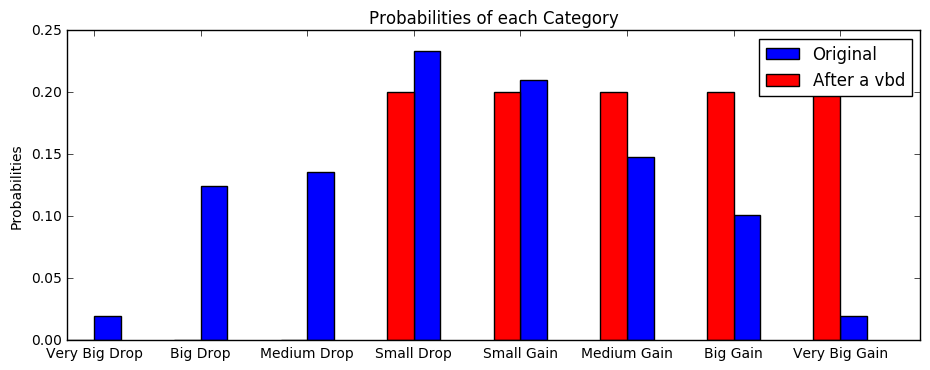

In [13]:
plot_two_day_probability_bar_graph('vbd', w_vbd_count, w_two_day_trends, w_cat_probs)
plt.show()

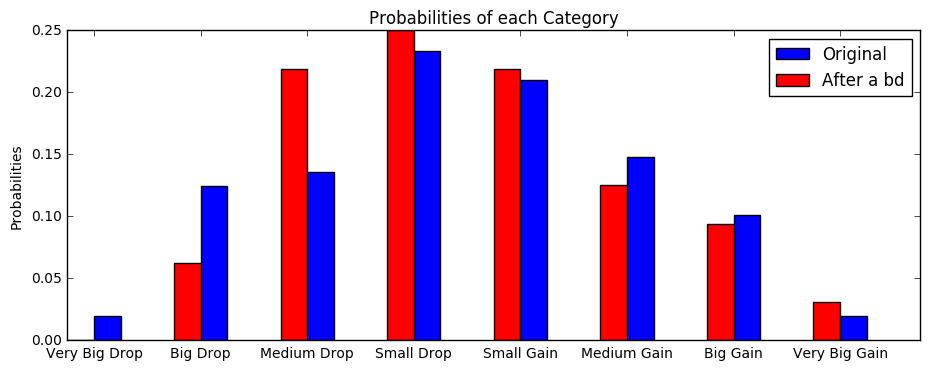

In [14]:
plot_two_day_probability_bar_graph('bd', w_bd_count, w_two_day_trends, w_cat_probs)
plt.show()

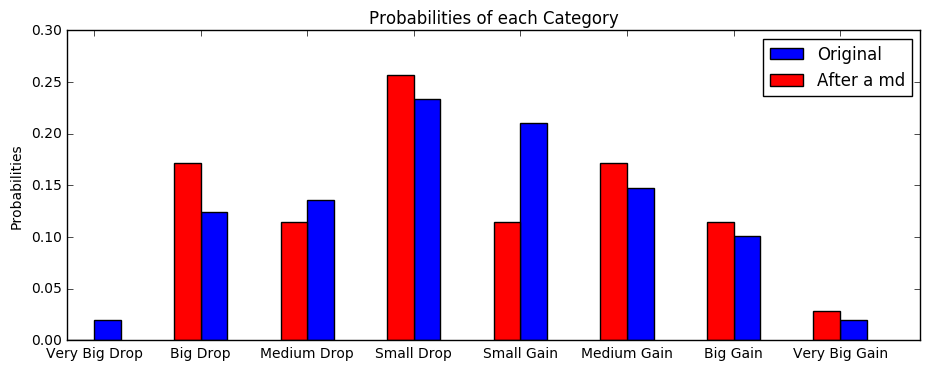

In [15]:
plot_two_day_probability_bar_graph('md', w_md_count, w_two_day_trends, w_cat_probs)
plt.show()

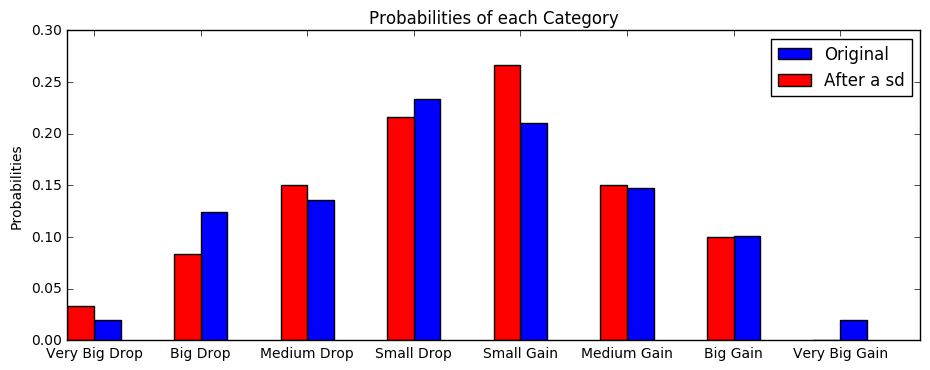

In [16]:
plot_two_day_probability_bar_graph('sd', w_sd_count, w_two_day_trends, w_cat_probs)
plt.show()

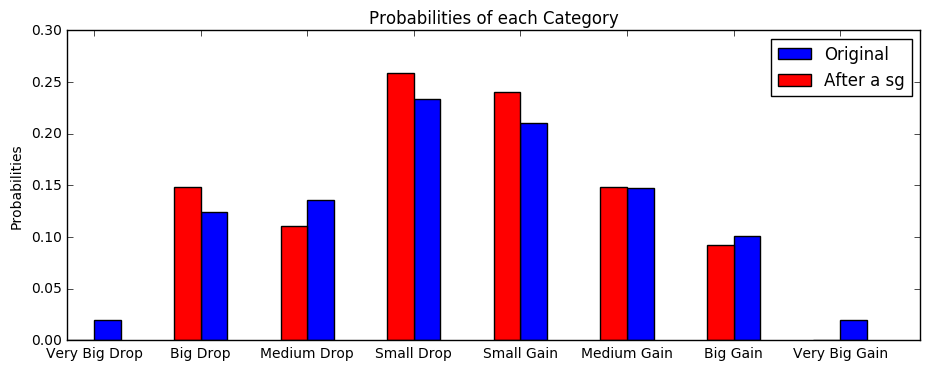

In [17]:
plot_two_day_probability_bar_graph('sg', w_sg_count, w_two_day_trends, w_cat_probs)
plt.show()

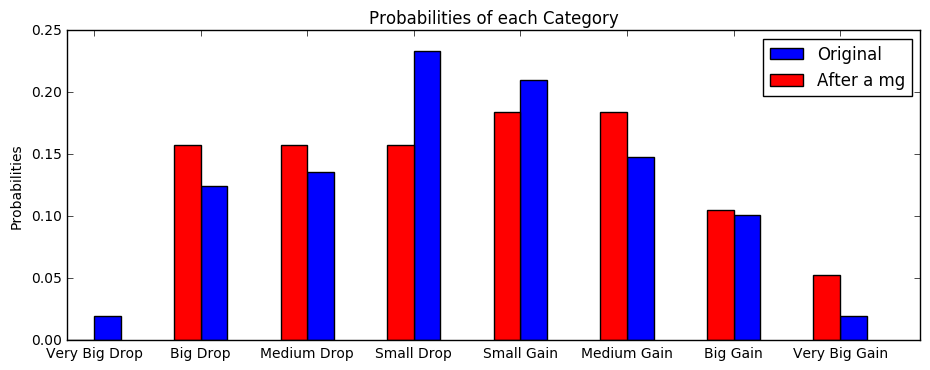

In [20]:
plot_two_day_probability_bar_graph('mg', w_mg_count, w_two_day_trends, w_cat_probs)
plt.show()

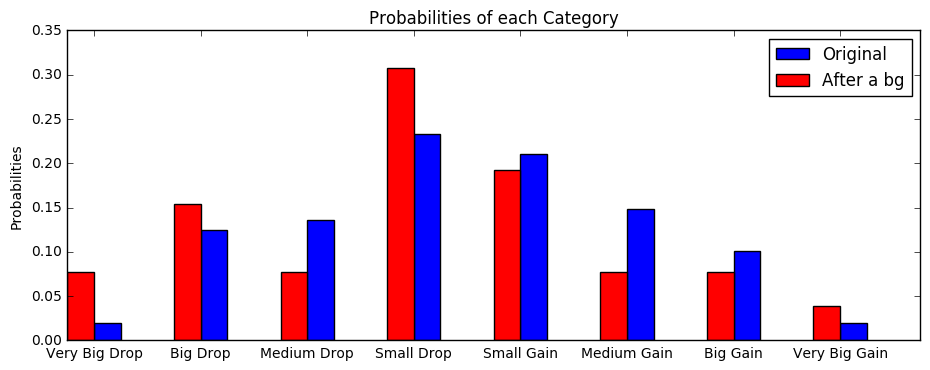

In [21]:
plot_two_day_probability_bar_graph('bg', w_bg_count, w_two_day_trends, w_cat_probs)
plt.show()

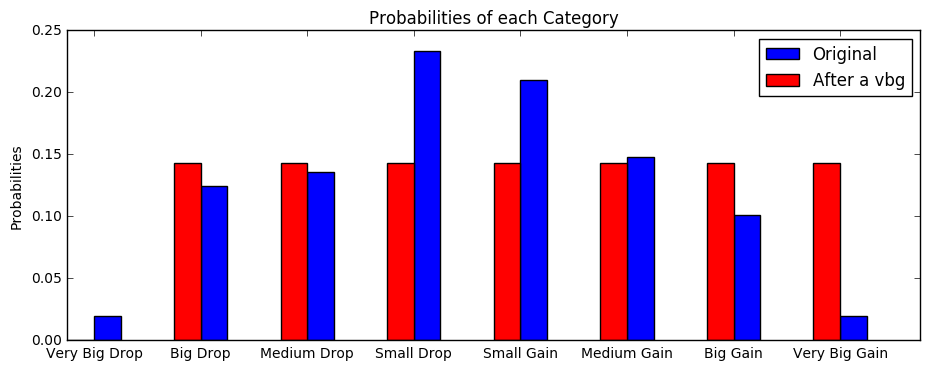

In [22]:
plot_two_day_probability_bar_graph('vbg', w_vbg_count, w_two_day_trends, w_cat_probs)
plt.show()

It looks like on a weekly level, there is very little momentum, but a more pronounced "snap back" effect. At least for TSLA

## Weekly Momentum for All Stocks

In [23]:
g = glob.glob('*.csv')

all_weekly_movements = []
all_weekly_categories = []
all_two_week_trends = []

w_vbd_count = 0
w_bd_count = 0
w_md_count = 0
w_sd_count = 0
w_sg_count = 0
w_mg_count = 0
w_bg_count = 0
w_vbg_count = 0
w_total_cat_count = 0

for i in range(len(g)):
    df = pd.DataFrame()
    df = df.from_csv(g[i])
    weekly_movements = get_price_movements(df, period=7)
    weekly_categories = categorize_movements(weekly_movements)
    
    all_weekly_movements.extend(weekly_movements)
    all_weekly_categories.extend(weekly_categories)
    
    w_vbd_count += count_movement_category(weekly_categories, 'vbd')
    w_bd_count += count_movement_category(weekly_categories, 'bd')
    w_md_count += count_movement_category(weekly_categories, 'md')
    w_sd_count += count_movement_category(weekly_categories, 'sd')
    w_sg_count += count_movement_category(weekly_categories, 'sg')
    w_mg_count += count_movement_category(weekly_categories, 'mg')
    w_bg_count += count_movement_category(weekly_categories, 'bg')
    w_vbg_count += count_movement_category(weekly_categories, 'vbg')
    w_total_cat_count += len(weekly_categories)
    
    two_week_trends = get_two_day_trends(weekly_categories)
    all_two_week_trends.extend(two_week_trends)

w_p_vbd = w_vbd_count / w_total_cat_count
w_p_bd = w_bd_count / w_total_cat_count
w_p_md = w_md_count / w_total_cat_count
w_p_sd = w_sd_count / w_total_cat_count
w_p_sg = w_sg_count / w_total_cat_count
w_p_mg = w_mg_count / w_total_cat_count
w_p_bg = w_bg_count / w_total_cat_count
w_p_vbg = w_vbd_count / w_total_cat_count

w_cat_counts = [w_vbd_count, w_bd_count, w_md_count, w_sd_count, w_sg_count, w_mg_count, w_bg_count, w_vbg_count]
w_cat_probs = [w_p_vbd, w_p_bd, w_p_md, w_p_sd, w_p_sg, w_p_mg, w_p_bg, w_p_vbg]

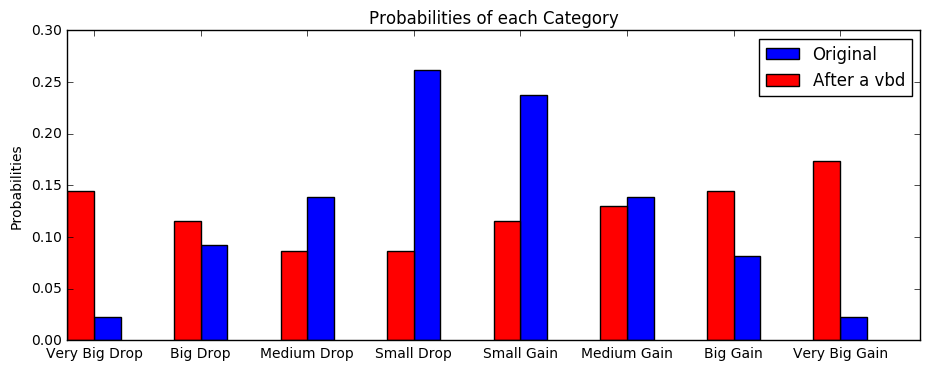

In [26]:
plot_two_day_probability_bar_graph('vbd', w_vbd_count, all_two_week_trends, w_cat_probs)
plt.show()

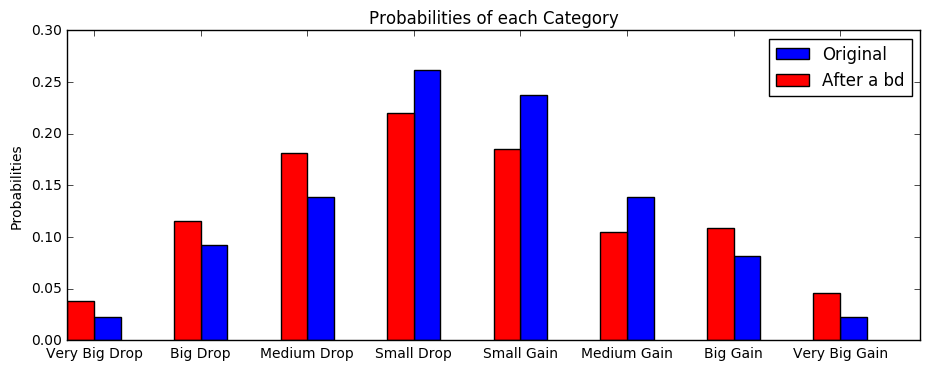

In [27]:
plot_two_day_probability_bar_graph('bd', w_bd_count, all_two_week_trends, w_cat_probs)
plt.show()

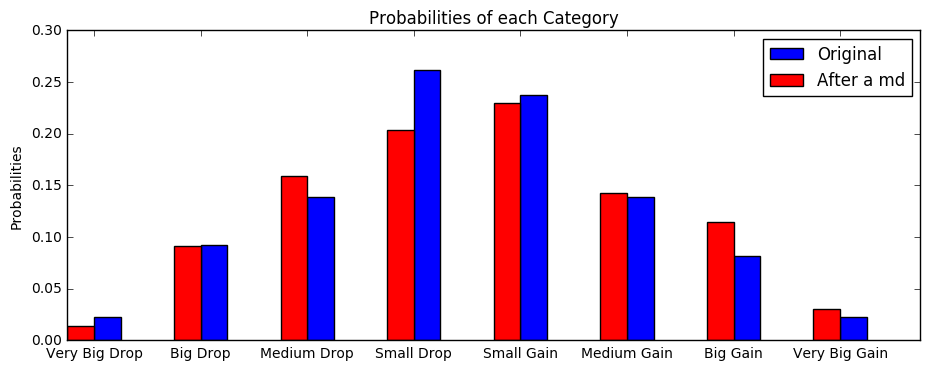

In [28]:
plot_two_day_probability_bar_graph('md', w_md_count, all_two_week_trends, w_cat_probs)
plt.show()

Looks like there is a positive snap-back here

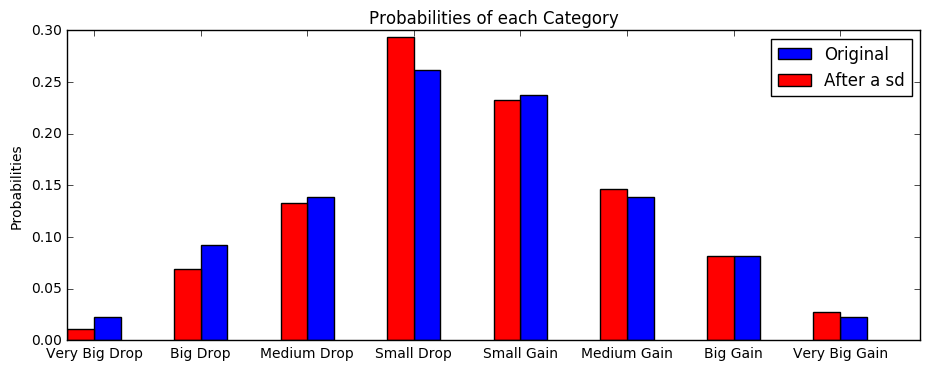

In [29]:
plot_two_day_probability_bar_graph('sd', w_sd_count, all_two_week_trends, w_cat_probs)
plt.show()

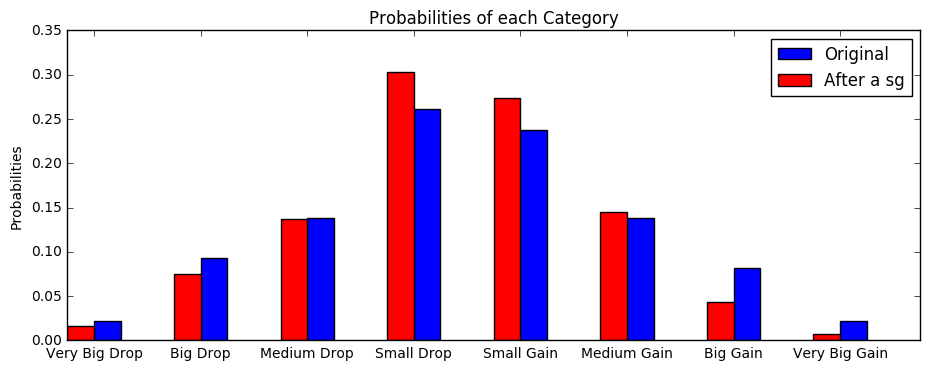

In [31]:
plot_two_day_probability_bar_graph('sg', w_sg_count, all_two_week_trends, w_cat_probs)
plt.show()

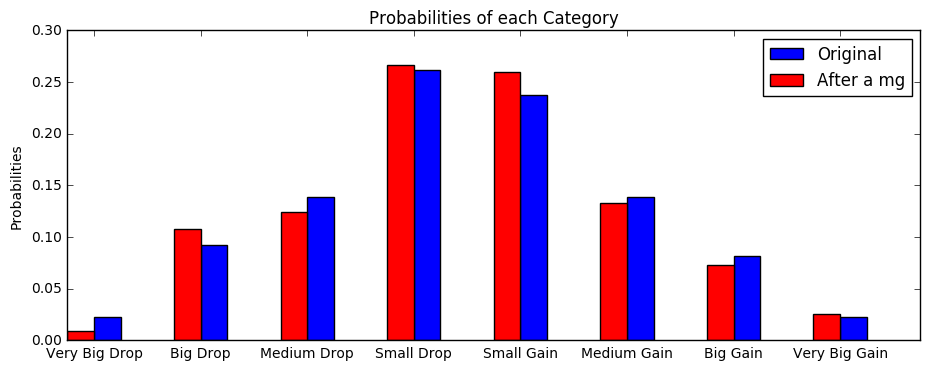

In [32]:
plot_two_day_probability_bar_graph('mg', w_mg_count, all_two_week_trends, w_cat_probs)
plt.show()

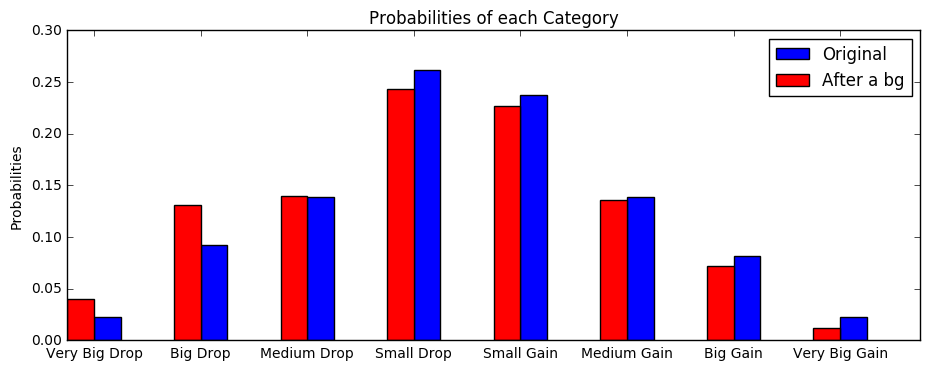

In [33]:
plot_two_day_probability_bar_graph('bg', w_bg_count, all_two_week_trends, w_cat_probs)
plt.show()

Large snap-back effect here

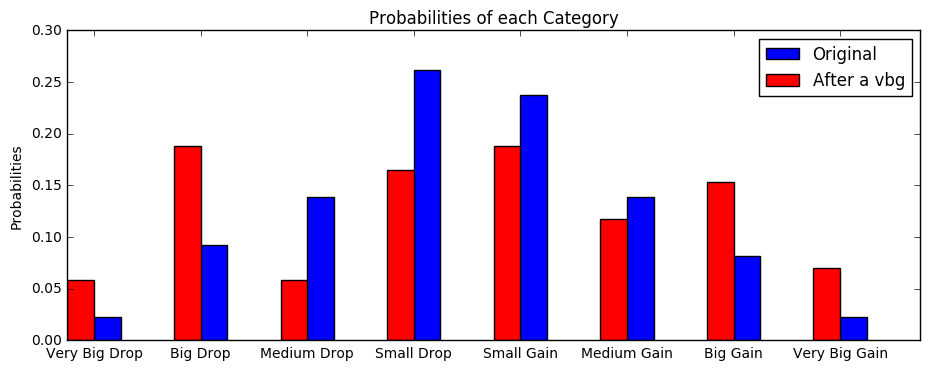

In [34]:
plot_two_day_probability_bar_graph('vbg', w_vbg_count, all_two_week_trends, w_cat_probs)
plt.show()

There is some momentum, and some tendency to revert towards the mean. (However, very big drops tend to cause very high volatility in both directions, and are skewed towards good returns).  
Also, gains that are large, but not > 2sigma, are very likely to snap back.

Maybe for "hype" or growth stocks, there is more emotion involved and thus more of a snap back effect? We can explore this later.